FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    3/30/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/SPECTRA/ABS_BC_MK_GOM21FA_Pchip_wavelenths.csv'
path_2 = "../../../Data_Thesis/CDOM/GRAPHS/ABS_BC_MK_GOM21FA_plot.png"
path_3 = '../../../Data_Thesis/CDOM/OUTPUTS/ABS_BC_MK_GOM21FA_outputs.csv'
files

['../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214642_Absorbance__0__06.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214642_Absorbance__1__07.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214642_Absorbance__2__08.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214643_Absorbance__0__09.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214643_Absorbance__1__10.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214643_Absorbance__2__11.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214644_Absorbance__0__12.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214644_Absorbance__1__13.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214644_Absorbance__2__14.txt',
 '../../../CDOM_DATA/GOM21FA/Benthic_chamber/_BC_MK\\ABS_BC_GOM21FA_214645_Absorbance__0__15.txt',
 '../../..

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
#WG 50 #1 : 190987 : 48.9
#WG 50 #2 : 190991 : 48.75
#WG 50 #3 : 192856 : 48.8 

#WG 10 CM 182380 

#X = .489 # 50 cm lwcc number 1 SN: , Basiclly antything from GOM2021 thats not PW
X = .4875 # 50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
#X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW

#X = .01 # Basiclly antything from thats not PW

PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [4]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [5]:
#EDIT HERE
####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,ABS_BC_GOM21FA_214642_Absorbance__0__06.txt,ABS_BC_GOM21FA_214642_Absorbance__1__07.txt,ABS_BC_GOM21FA_214642_Absorbance__2__08.txt,ABS_BC_GOM21FA_214643_Absorbance__0__09.txt,ABS_BC_GOM21FA_214643_Absorbance__1__10.txt,ABS_BC_GOM21FA_214643_Absorbance__2__11.txt,ABS_BC_GOM21FA_214644_Absorbance__0__12.txt,ABS_BC_GOM21FA_214644_Absorbance__1__13.txt,ABS_BC_GOM21FA_214644_Absorbance__2__14.txt,ABS_BC_GOM21FA_214645_Absorbance__0__15.txt,...,ABS_BC_GOM21FA_214657_Absorbance__2__50.txt,ABS_BC_GOM21FA_214658_Absorbance__0__51.txt,ABS_BC_GOM21FA_214658_Absorbance__1__52.txt,ABS_BC_GOM21FA_214658_Absorbance__2__53.txt,ABS_BC_GOM21FA_StMK_DOCSTD_Pre_Absorbance__0__03.txt,ABS_BC_GOM21FA_StMK_DOCSTD_Pre_Absorbance__1__04.txt,ABS_BC_GOM21FA_StMK_DOCSTD_Pre_Absorbance__2__05.txt,ABS_BC_GOM21FA_StMK_NaClBlank_Pre_Absorbance__0__00.txt,ABS_BC_GOM21FA_StMK_NaClBlank_Pre_Absorbance__1__01.txt,ABS_BC_GOM21FA_StMK_NaClBlank_Pre_Absorbance__2__02.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,-1.002927,-1.021351,-1.028437,-1.329835,-1.335976,-1.125754,-1.285901,-1.406365,-1.283539,-1.356762,...,-2.032781,-2.095139,-2.037033,-2.014357,-0.804042,-0.917421,-0.830497,-0.507369,-0.399187,-0.752077
190,-1.002927,-1.021351,-1.028437,-1.329835,-1.335976,-1.125754,-1.285901,-1.406365,-1.283539,-1.356762,...,-2.032781,-2.095139,-2.037033,-2.014357,-0.804042,-0.917421,-0.830497,-0.507369,-0.399187,-0.752077
191,-0.908242,-0.890347,-0.905054,-1.065999,-1.147482,-0.922536,-1.148755,-1.186201,-1.135734,-1.246680,...,-1.939601,-1.935852,-1.914009,-1.925515,-0.510977,-0.614467,-0.472893,-0.508480,-0.384176,-0.506513
192,-0.753961,-0.944084,-0.831289,-1.035244,-1.041950,-1.086397,-1.205578,-1.106132,-1.216776,-1.248558,...,-1.907844,-1.891611,-1.831681,-1.898524,-0.436291,-0.479110,-0.422956,-0.242536,-0.328725,-0.392813
193,-0.854810,-0.702063,-0.631123,-0.973706,-1.045057,-0.942699,-1.011194,-1.119565,-0.991616,-1.152561,...,-1.818914,-1.890868,-1.796016,-1.871421,-0.481408,-0.353662,-0.465020,-0.368885,-0.368846,-0.308386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-1.286095,-1.301074,-1.351174,-1.449420,-1.411069,-1.485766,-1.509280,-1.504189,-1.596663,-1.701344,...,-2.348371,-2.439827,-2.372446,-2.337902,-0.906051,-0.918737,-0.877557,-0.633960,-0.720782,-0.490960
877,-0.831765,-0.983697,-0.954049,-1.072172,-1.117675,-1.028989,-1.271434,-1.282970,-1.279041,-1.378596,...,-2.130873,-2.059037,-2.038784,-2.148077,-0.529990,-0.564103,-0.460874,-0.356344,-0.215594,-0.345303
878,-1.150797,-1.059696,-1.175051,-1.441638,-1.550442,-1.264585,-1.687651,-1.544919,-1.717370,-1.616428,...,-2.393219,-2.433935,-2.425064,-2.419639,-0.887439,-0.943013,-0.883810,-0.690732,-0.768977,-0.457017


In [6]:
#EDIT HERE
####################################
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=9).str[3]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df

,214642,214643,214644,214645,214646,214647,214648,214649,214651,214652,214654,214655,214656,214657,214658,DOCSTD,NaClBlank
wl,,,,,,,,,,,,,,,,,
189,-1.017572,-1.263855,-1.325268,-1.348416,-1.574543,-1.650286,-1.667451,-1.777995,-1.828385,-1.977509,-1.962550,-1.999083,-2.022861,-2.009161,-2.048843,-0.850653,-0.552877
190,-1.017572,-1.263855,-1.325268,-1.348416,-1.574543,-1.650286,-1.667451,-1.777995,-1.828385,-1.977509,-1.962550,-1.999083,-2.022861,-2.009161,-2.048843,-0.850653,-0.552877
191,-0.901214,-1.045339,-1.156897,-1.237103,-1.405211,-1.484782,-1.535206,-1.659943,-1.700058,-1.816515,-1.838360,-1.909537,-1.911984,-1.895779,-1.925125,-0.532779,-0.466390
192,-0.843111,-1.054530,-1.176162,-1.271544,-1.380869,-1.395274,-1.466853,-1.595827,-1.692547,-1.800974,-1.800679,-1.840005,-1.819637,-1.890903,-1.873938,-0.446119,-0.321358
193,-0.729332,-0.987154,-1.040791,-1.211644,-1.240199,-1.309761,-1.381670,-1.539050,-1.606958,-1.699587,-1.739748,-1.748156,-1.744815,-1.786692,-1.852768,-0.433364,-0.348706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-1.312781,-1.448752,-1.536710,-1.610749,-1.814416,-1.789014,-1.916990,-2.032776,-2.203483,-2.276427,-2.274792,-2.279403,-2.363425,-2.344393,-2.383391,-0.900782,-0.615234
877,-0.923170,-1.072945,-1.277815,-1.413656,-1.515191,-1.561524,-1.645781,-1.770785,-1.870752,-1.930113,-1.967555,-2.006947,-2.061267,-2.098916,-2.081966,-0.518322,-0.305747
878,-1.128515,-1.418888,-1.649980,-1.701803,-1.762290,-1.901394,-1.950818,-2.092212,-2.203919,-2.288946,-2.284061,-2.261811,-2.353255,-2.370302,-2.426212,-0.904754,-0.638909


In [7]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

In [8]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

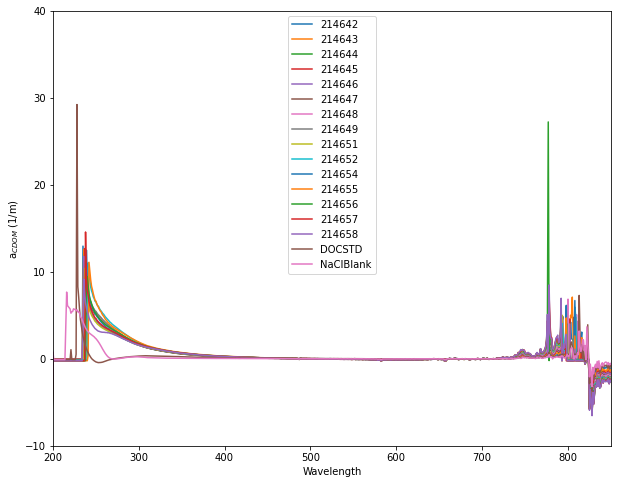

In [9]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-10,40)
ax.set_xlim(200,850)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.set_title("BC_ABS_BLU22_2226_GB")

plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [10]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [11]:
#EDIT HERE
####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
names = d.columns.str.rsplit('_', n=9).str[3]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = df.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,214642,214643,214644,214645,214646,214647,214648,214649,214651,214652,214654,214655,214656,214657,214658,DOCSTD,NaClBlank,wl
wl,,,,,,,,,,,,,,,,,,
189.2794,-1.017572,-1.263855,-1.325268,-1.348416,-1.574543,-1.650286,-1.667451,-1.777995,-1.828385,-1.977509,-1.962550,-1.999083,-2.022861,-2.009161,-2.048843,-0.850653,-0.552877,189.2794
189.6618,-1.017572,-1.263855,-1.325268,-1.348416,-1.574543,-1.650286,-1.667451,-1.777995,-1.828385,-1.977509,-1.962550,-1.999083,-2.022861,-2.009161,-2.048843,-0.850653,-0.552877,189.6618
190.0441,-1.017572,-1.263855,-1.325268,-1.348416,-1.574543,-1.650286,-1.667451,-1.777995,-1.828385,-1.977509,-1.962550,-1.999083,-2.022861,-2.009161,-2.048843,-0.850653,-0.552877,190.0441
190.4264,-0.943403,-1.111424,-1.253462,-1.336291,-1.497147,-1.513288,-1.602101,-1.733903,-1.828228,-1.839723,-1.936567,-1.986328,-1.976879,-2.054985,-2.054040,-0.725465,-0.347222,190.4264
190.8087,-0.742157,-0.911279,-0.978992,-1.125281,-1.287790,-1.386209,-1.415499,-1.577063,-1.542419,-1.704299,-1.703196,-1.774373,-1.772641,-1.797206,-1.790435,-0.446900,-0.317617,190.8087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,-0.597284,-0.934585,-1.042924,-1.173310,-1.327866,-1.375816,-1.398019,-1.565095,-1.653593,-1.777837,-1.863973,-1.812638,-1.850588,-1.869170,-1.936882,-0.317145,-0.279982,880.5978
880.8884,-1.071741,-1.300860,-1.413294,-1.485100,-1.733667,-1.743351,-1.787128,-1.950897,-2.103328,-2.173245,-2.157655,-2.214817,-2.210093,-2.243634,-2.331817,-0.775855,-0.445955,880.8884
881.1790,-1.225590,-1.340385,-1.485730,-1.615171,-1.695244,-1.852636,-1.799883,-2.013570,-2.128208,-2.161119,-2.238910,-2.258593,-2.295599,-2.264735,-2.300480,-0.668933,-0.460600,881.1790


In [12]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [13]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


In [15]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [16]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (.001, 11, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [20]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

!!! WARNING !!! 275_700 has a bad R2 !!!


In [21]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
214642,0.019618,0.008047,0.018725,6.117987,1.286950,-0.001243,4.100876,2.366967,1.079037,0.176125,0.100989,4.622479,2.412015,1.048884,0.199973,0.123837,0.429743,-1035.657017,0.048611
214643,0.021195,0.014985,0.019004,6.583081,3.262911,-0.001271,4.913634,2.726211,1.182941,0.191053,0.117408,5.552982,2.775146,1.152065,0.218116,0.141415,0.788521,-2566.364079,0.183471
214644,0.020973,0.015437,0.018496,6.522502,3.393101,-0.001281,4.872611,2.792214,1.313812,0.352013,0.279442,5.485950,2.840029,1.283140,0.378039,0.302846,0.834618,-2648.178698,0.170713
214645,0.020402,0.012623,0.018497,6.352682,2.593036,-0.001223,4.683201,2.662290,1.199156,0.216942,0.139700,5.285144,2.711693,1.167344,0.243279,0.163996,0.682418,-2119.832194,0.210881
214646,0.018754,0.007151,0.017811,5.867338,1.031144,5.643299,4.113022,2.449445,1.178360,0.243396,0.160630,4.627770,2.498118,1.146028,0.267076,0.184445,0.401483,0.182720,-0.071779
214647,0.021525,0.014687,0.018805,6.682096,3.178315,-0.001032,4.917107,2.743559,1.226473,0.268838,0.199423,5.550207,2.790839,1.196932,0.294997,0.222310,0.781035,-3078.988022,0.137564
214648,0.019782,0.012885,0.017950,6.167688,2.666836,5.696927,4.657827,2.721297,1.290553,0.296596,0.214854,5.242235,2.772341,1.257986,0.322866,0.239780,0.717791,0.468118,0.133094
214649,0.020400,0.015121,0.018379,6.353586,3.303292,-0.001215,4.844528,2.778731,1.282961,0.278682,0.199690,5.462641,2.830149,1.250535,0.305514,0.224447,0.822743,-2719.492774,0.206998
214651,0.017913,0.007900,0.016997,5.620813,1.244910,5.343090,4.193377,2.611900,1.369756,0.411937,0.321914,4.697373,2.664222,1.335863,0.434929,0.346242,0.464759,0.232994,0.023316
